# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ravie Arjun Nadhief
- **Email:** raviearjunnadhief@mail.ugm.ac.id
- **ID Dicoding:** raviearjun

## Menentukan Pertanyaan Bisnis

- Apakah ada kaitan antara lama pengiriman dan tingkat kepuasan pelanggan?
- Apa jenis produk yang memberi income paling besar bagi perusahaan selama perusahaan berdiri? Apakah ada kaitannya dengan jenis barang paling laris terjual?
- Bagaimana tren penjualan selama perusahaan berdiri?
- Kota mana saja yang merupakan basis pelanggan bagi perusahaan? Bagaimana persebaran geografis pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [3]:
products_df = pd.read_csv('/content/drive/MyDrive/Dicoding Academy/E-Commerce Public Dataset/products_dataset.csv')
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [4]:
order_reviews_df = pd.read_csv('/content/drive/MyDrive/Dicoding Academy/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [5]:
order_payments_df = pd.read_csv('/content/drive/MyDrive/Dicoding Academy/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [6]:
order_items_df = pd.read_csv('/content/drive/MyDrive/Dicoding Academy/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [7]:
orders_df = pd.read_csv('/content/drive/MyDrive/Dicoding Academy/E-Commerce Public Dataset/orders_dataset.csv')
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [8]:
geolocation_df = pd.read_csv('/content/drive/MyDrive/Dicoding Academy/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [9]:
customers_df = pd.read_csv('/content/drive/MyDrive/Dicoding Academy/E-Commerce Public Dataset/customers_dataset.csv')
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [10]:
product_category_name_df = pd.read_csv('/content/drive/MyDrive/Dicoding Academy/E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_name_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [11]:
sellers_df = pd.read_csv('/content/drive/MyDrive/Dicoding Academy/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


### Assessing Data

Assessing products_df

In [12]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Terdapat kesalahan dalam penulisan judul kolom yaitu product_category_lenght yang seharusnya product_category_length. begitu juga dnegan product_description_lenght yang seharusnya product_description_length.

In [13]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [14]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Terdapat invalid value pada kolom `product_weight_g`, yaitu minimal berat produk yang 0.0 gram padahal produk itu memiliki dimensi panjang, lebar, tinggi. Untuk itu kita perlu menyelidikinya lebih lanjut untuk menemukan informasi tambahan guna memperbaiki data-data ini.

In [15]:
products_df[products_df['product_weight_g']==0]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


Ternyata ada empat entri yang memiliki invalid value pada kolom `product_weight_g`. Kita perlu mengeksplore lebih lanjut melalui kesamaan fitur nama kategori dan dimensi produk guna mengetahui kemungkinan adanya produk sejenis yang memiliki karakteristik serupa.

In [16]:
products_df[
    (products_df['product_category_name']=='cama_mesa_banho') &
    (products_df['product_length_cm']==30) &
    (products_df['product_height_cm']==25) &
    (products_df['product_width_cm']==30)
]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1731,500909059ad72b36b2554150cc327edb,cama_mesa_banho,39.0,1140.0,1.0,3100.0,30.0,25.0,30.0
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


Ternyata ada satu produk yang cocok dengan empat entri produk tadi. Produk ini memiliki berat 3100 g. Untuk itu, kita akan memperbaiki invalid value ini pada tahap data cleaning dengan mengganti nilai beratnya menjadi 3100.0

In [17]:
products_df.describe(include=object)

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


In [18]:
products_df.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [19]:
products_df[
    (products_df['product_category_name'].isnull()) &
    (products_df['product_name_lenght'].isnull()) &
    (products_df['product_description_lenght'].isnull()) &
    (products_df['product_photos_qty'].isnull())
]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Sebanyak 610 produk menyumbang secara bersamaan missing value pada empat kolom (product_category_name, product_name_lenght, product_description_lenght, product_photos_qty). Dari keempat kolom itu, yang perlu dilakukan imputasi adalah product_category_name. Kita akan melakukan pengisian missing value dengan nilai modus.

In [20]:
products_df[
    (products_df['product_weight_g'].isnull()) &
    (products_df['product_length_cm'].isnull()) &
    (products_df['product_height_cm'].isnull()) &
    (products_df['product_width_cm'].isnull())
]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
products_df.duplicated().sum()

0

- Entri yang semua kolomnya selain kolom product_id bernilai missing value akan di-drop saja karena tidak ada informasi yang bisa digunakan untuk mengisi missing value yang ada.
- Entri dengan missing value pada kolom dimensi volume dan berat tidak akan dilakukan imputasi karena infromasinya tidak mendukung jawaban atas pertanyaan bisnis yang diajukan di awal.



---



Assessing customers_df

In [22]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [23]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [24]:
customers_df.describe(include=object)

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [25]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [26]:
customers_df.duplicated().sum()

0

Tidak terdapat permasalahan pada tabel customers_df, baik missing value, duplikat, maupun data inkonsisten. Semua aman.



---



Assessing sellers_df

In [27]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [28]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [29]:
sellers_df.describe(include=object)

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,3442f8959a84dea7ee197c632cb2df15,sao paulo,SP
freq,1,694,1849


In [30]:
sellers_df.duplicated().sum()

0

Tidak terdapat permasalahan pada tabel sellers_df, baik missing value, duplikat, maupun data inkonsisten. Semua aman.



---



Assessing geolocation_df

In [31]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [32]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [33]:
geolocation_df.describe(include=object)

,geolocation_city,geolocation_state
count,1000163,1000163
unique,8011,27
top,sao paulo,SP
freq,135800,404268


In [34]:
geolocation_df.duplicated().sum()

261831

Tidak terdapat permasalahan missing value maupun data inkonsisten pada tabel geolocation_df. Namun, ada sebanyak 261831 data terduplikat sehingga kita bisa langsung men-drop-nya.

In [35]:
geolocation_df.drop_duplicates(inplace=True)

In [36]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0




---



Assessing orders_df

In [37]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [38]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [39]:
orders_df.describe(include=object)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Pada tabel orders_df, terdapat beberapa kesalahan tipe data pada kolom-kolomnya, yaitu kolom yang memuat sebuah penanda waktu malah ditipekan sebagai objek. Kita akan memperbaikinya di data cleaning.

In [40]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Menilai missing value pada kolom `order_approved_at`

In [41]:
order_approved_nat = orders_df[orders_df['order_approved_at'].isna()]
order_approved_nat.order_status.value_counts()

,count
order_status,
canceled,141
delivered,14
created,5


Untuk produk dengan `order_status` canceled atau created sudah pasti nilai pada kolom `order_approved_at` adalah NaT karena produk yang dibatalkan pemesanannya atau produk yang baru saja dibuat pesanannya pasti tidak atau belum pernah di-approve penjual. Untuk itu, masalah missing value pada kolom `order_approved_at` ini hanyalah pada entri dengan order_status = 'delivered'. Kita akan mengisinya dengan rata-rata waktu pemrosesan (t.approved - t.created).

Menilai missing value pada kolom `order_delivered_carrier_date`

In [42]:
order_delivered_carrier_nat = orders_df[orders_df['order_delivered_carrier_date'].isna()]
order_delivered_carrier_nat.order_status.value_counts()

,count
order_status,
unavailable,609
canceled,550
invoiced,314
processing,301
created,5
approved,2
delivered,2


Masalah missing value pada kolom `order_delivered_carrier_date` hanya terletak pada entri dengan `order_status` delivered. Kita akan mengisinya dengan rata-rata waktu mengirimkan paket ke kurir/jasa pengiriman.

Menilai missing value pada kolom `order_delivered_customer_date`

In [43]:
order_delivered_customer_nat = orders_df[orders_df['order_delivered_customer_date'].isna()]
order_delivered_customer_nat.order_status.value_counts()

,count
order_status,
shipped,1107
canceled,619
unavailable,609
invoiced,314
processing,301
delivered,8
created,5
approved,2


Permasalahan missing value pada kolom `order_delivered_customer_date` hanya ada pada entri dengan `order_status` delivered. Mising value akan diisi dengan rata-rata waktu pengiriman dari pesanan dibuat (order_delivered_customer_date - order_purchase_timestamp)

In [44]:
orders_df.duplicated().sum()

0



---



Assessing order_reviews_df

In [45]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [46]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [47]:
order_reviews_df.describe(include=object)

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,11568,40977,99224,99224
unique,98410,98673,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,423,230,463,4


Kita tidak akan menangani missing value pada kolom `review_comment_title` dan `review_comment_message` karena kita tidak membutuhkan informasinya untuk menjawab pertanyaan bisnis kita di awal.

Pada tabel order_reviews_df, terdapat beberapa kesalahan tipe data pada kolom-kolomnya, yaitu kolom yang memuat sebuah penanda waktu malah ditipekan sebagai objek. Kita akan memperbaikinya di data cleaning

In [48]:
order_reviews_df.duplicated().sum()

0

Tidak ada data duplikat terdeteksi pada tabel.



---



Assessing order_payments_df

In [49]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [50]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [51]:
order_payments_df.describe(include=object)

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


In [52]:
order_payments_df.duplicated().sum()

0

Tidak terdapat permasalahan pada tabel order_payments_df, baik missing value, duplikat, maupun data inkonsisten. Semua aman.



---



Assessing order_items_df

In [53]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [54]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [55]:
order_items_df.duplicated().sum()

0

Ada satu permasalahan tipe data, yaitu tipe data kolom shipping_limit_date yang bertipe object padahal seharusnya bertipe datetime. Selain dari yang disebutkan, tidak ada permasalahan missing value dan data terduplikat.



---



In [56]:
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [57]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Kita akan membandingkan dua tabel yaitu tabel products_df, terutama pada kolom `product_category_name` dengan tabel product_category_name_df pada kolom dengan nama yang sama. Ini berguna untuk mengecek apakah ada nama kategori dalam bahasa Inggris yang belum diinputkan ke database.

In [58]:
merged_df = pd.merge(products_df, product_category_name_df, on='product_category_name', how='left')
merged_df[merged_df['product_category_name_english'].isna() & merged_df['product_category_name'].notna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,NaN
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,NaN
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,NaN
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,NaN
11039,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
14266,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0,NaN
16182,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0,NaN
16930,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0,NaN
17800,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0,NaN


Ternyata, ada dua kategori produk (dalam bahasa Inggris) yang belum diinputkan ke table product_category_name, yaitu kategori pc_gamer dan kitchen_appliances_and_food_preparers (terjemahan dari 'portateis_cozinha_e_preparadores_de_alimentos'). Kita akan menambahkan dua kategori tersebut di Data Cleaning.

### Cleaning Data

#### **Membersihkan Tabel products_df**

Membenarkan judul kolom `product_category_name` dan `product_name_length` pada tabel products_df

In [59]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [60]:
products_df.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
}, inplace=True)

Mengisi missing value pada kolom `product_category_name` dengan modus

In [61]:
products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)

<ipython-input-61-518f44aaf083>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)


Mengganti `product_weight_g` yang bernilai 0 dengan 3100

In [62]:
products_df.loc[products_df['product_weight_g'] == 0, 'product_weight_g'] = 3100

Menghapus entri yang semua kolom karakteristiknya (nonkey) bernilai missing value

In [63]:
products_df.dropna(how='all', subset=products_df.columns.difference(['product_id']), inplace=True)



---



####**Membersihkan Tabel orders_df**

Membenarkan tipe data kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` yang masih bertipe object menjadi datetime

In [64]:
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

Menambahkan kolom baru untuk mengetahui seberapa lama pesanan diproses, pesanan dikirimkan ke kurir, pesanan diterima pelanggan

In [65]:
orders_df['order_processing_time_h'] = (orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']).dt.total_seconds() / 3600
orders_df['order_shipping_time_d'] = (orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']).dt.total_seconds() / 86400
orders_df['order_delivery_time_d'] = (orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']).dt.total_seconds() / 86400

Mengisi missing value berdasarkan data assessing

In [66]:
mean_processing_time = orders_df['order_processing_time_h'].mean()

# mengisi missing value pada kolom order_processing_time
orders_df.loc[(orders_df['order_status'] == 'delivered') & (orders_df['order_processing_time_h'].isna()), 'order_processing_time_h'] = mean_processing_time

# mengisi missing value pada kolom order_approved_at dengan menambahkan tanggal pemesanan dengan rata-rata waktu pemrosesan pemesanan
orders_df.loc[(orders_df['order_status'] == 'delivered') & (orders_df['order_approved_at'].isna()), 'order_approved_at'] = (
    orders_df['order_purchase_timestamp'] + pd.to_timedelta(mean_processing_time, unit='h')
    ).dt.floor('s')

In [67]:
mean_shipping_time = orders_df['order_shipping_time_d'].mean()

# mengisi missing value pada kolom order_shipping_time_d
orders_df.loc[(orders_df['order_status'] == 'delivered') & (orders_df['order_shipping_time_d'].isna()), 'order_shipping_time_d'] = mean_shipping_time

# mengisi missing value pada kolom order_approved_at
orders_df.loc[(orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_carrier_date'].isna()), 'order_delivered_carrier_date'] = (
    orders_df['order_approved_at'] + pd.to_timedelta(mean_shipping_time, unit='d')
    ).dt.floor('s')

In [68]:
mean_delivery_time = orders_df['order_delivery_time_d'].mean()

# mengisi missing value pada kolom order_delivery_time_d
orders_df.loc[(orders_df['order_status'] == 'delivered') & (orders_df['order_delivery_time_d'].isna()), 'order_delivery_time_d'] = mean_delivery_time

# mengisi missing value pada kolom order_delivered_customer_date
orders_df.loc[(orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_customer_date'].isna()), 'order_delivered_customer_date'] = (
    orders_df['order_approved_at'] + pd.to_timedelta(mean_delivery_time, unit='d')
    ).dt.floor('s')

In [69]:
orders_df.describe(include=np.number)

,order_processing_time_h,order_shipping_time_d,order_delivery_time_d
count,99295.000000,97660.000000,96484.000000
mean,10.419094,2.805038,9.330547
std,26.036168,3.549136,8.759713
min,0.000000,-171.219005,-16.096169
25%,0.215000,0.875645,4.100399
50%,0.343611,1.819103,7.099861
75%,14.578750,3.579933,12.028620
max,4509.180556,125.762569,205.190972



- Setelah melalui pembersihan tahap awal, ternyata ditemukan fakta baru yaitu terdapat beberapa kesalahan dalam pencatatan tanggal pada kolom `order_approved_at` dan `order_delivered_carrier_date` yang menyebabkan `order_shipping_time_d` (rentang waktu pesanan diapprove sampai pesanan diterima jasa kirim/kurir) bernilai negatif.
- Hal yang sama terjadi juga dengan beberapa entri pada dua kolomnya, yaitu `order_delivered_customer_date` dan `order_delivered_carrier_date` yang menyebabkan `order_delivery_time_d` (waktu pengiriman barang) menjadi negatif. Untuk masalah ini, diasumsikan nilai kedua kolom itu tertukar sehingga perlu diperbaiki dengan menukar balik nilainya.

In [70]:
orders_df.loc[orders_df['order_shipping_time_d'] < 0, ['order_shipping_time_d', 'order_delivered_carrier_date', 'order_approved_at']]

,order_shipping_time_d,order_delivered_carrier_date,order_approved_at
15,-1.359051,2018-06-11 14:54:00,2018-06-12 23:31:02
64,-0.962593,2018-04-23 19:19:14,2018-04-24 18:25:22
199,-2.440891,2018-07-24 12:57:00,2018-07-26 23:31:53
210,-0.005475,2018-07-23 12:24:00,2018-07-23 12:31:53
415,-3.394549,2018-07-24 14:03:00,2018-07-27 23:31:09
...,...,...,...
99091,-0.088183,2018-07-05 14:11:00,2018-07-05 16:17:59
99230,-2.149907,2018-07-03 12:57:00,2018-07-05 16:32:52
99266,-4.222083,2018-01-31 18:11:58,2018-02-04 23:31:46
99377,-1.088542,2018-04-23 17:18:40,2018-04-24 19:26:10


In [71]:
orders_df.loc[orders_df['order_delivery_time_d'] < 0, ['order_delivery_time_d', 'order_delivered_customer_date', 'order_delivered_carrier_date']]

,order_delivery_time_d,order_delivered_customer_date,order_delivered_carrier_date
6437,-2.892384,2017-07-25 19:32:56,2017-07-28 16:57:58
9553,-1.121412,2017-07-06 14:27:51,2017-07-07 17:22:41
13487,-1.214282,2017-07-19 14:13:28,2017-07-20 19:22:02
14474,-6.009954,2017-07-26 18:09:10,2017-08-01 18:23:30
19268,-0.174317,2017-07-20 18:52:41,2017-07-20 23:03:42
21338,-0.743137,2016-10-25 17:51:46,2016-10-26 11:41:53
22520,-0.962720,2017-06-26 15:45:35,2017-06-27 14:51:54
25393,-0.016181,2017-08-10 18:05:38,2017-08-10 18:28:56
25646,-1.019340,2017-07-31 17:49:56,2017-08-01 18:17:47
27470,-7.878958,2017-08-01 21:13:01,2017-08-09 18:18:43


In [72]:
# Find rows where 'order_shipping_time_d' is negative
negative_shipping_time_rows = orders_df[orders_df['order_shipping_time_d'] < 0]

# Swap the values of 'order_approved_at' and 'order_delivered_carrier_date' for those rows
for index in negative_shipping_time_rows.index:
    orders_df.loc[index, 'order_approved_at'], orders_df.loc[index, 'order_delivered_carrier_date'] = \
        orders_df.loc[index, 'order_delivered_carrier_date'], orders_df.loc[index, 'order_approved_at']

# Recalculate 'order_shipping_time_d'
orders_df['order_shipping_time_d'] = (orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']).dt.total_seconds() / 86400

In [73]:
# Find rows where 'order_delivery_date_time_d` is negative
negative_delivery_time_rows = orders_df[orders_df['order_delivery_time_d'] < 0]

# Swap the values of `order_delivered_customer_date` and `order_delivered_carrier_date` for those rows
for index in negative_delivery_time_rows.index:
    orders_df.loc[index, 'order_delivered_customer_date'], orders_df.loc[index, 'order_delivered_carrier_date'] = \
        orders_df.loc[index, 'order_delivered_carrier_date'], orders_df.loc[index, 'order_delivered_customer_date']

# Recalculate `order_delivery_time_d`
orders_df['order_delivery_time_d'] = (orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']).dt.total_seconds() / 86400

In [74]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,146
order_delivered_carrier_date,1781
order_delivered_customer_date,2957
order_estimated_delivery_date,0
order_processing_time_h,146
order_shipping_time_d,1781




---



#### **Membersihkan Tabel order_reviews_df**

In [75]:
datetime_columns = ['review_creation_date', 'review_answer_timestamp']

# memperbaiki tipe data pada kolom yang harus bertipe datetime
for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [76]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB




---



#### **Membersihkan Tabel order_items_df**

In [77]:
datetime_columns = ['shipping_limit_date']

# memperbaiki tipe data pada kolom yang harus bertipe datetime
for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [78]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### **Membersihkan Tabel product_category_name**

In [79]:
# Create a new DataFrame with the new entries
new_entries = pd.DataFrame({
    'product_category_name': ['pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
    'product_category_name_english': ['pc_gamer', 'kitchen_appliances_and_food_preparers']
})

# Concatenate the new entries with the existing DataFrame
product_category_name_df = pd.concat([product_category_name_df, new_entries], ignore_index=True)

# Display the updated DataFrame (optional)
product_category_name_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,pc_gamer,pc_gamer


## Exploratory Data Analysis (EDA)

### Explore `products_df`

In [80]:
products_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [81]:
products_df.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.848827,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4281.974864,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [82]:
products_df.describe(include=object)

,product_id,product_category_name
count,32951,32951
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3639


In [83]:
products_df.sample(5)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
18572,4a5cc900bb2910a2b8dec20cebf1c0fb,cool_stuff,43.0,1294.0,5.0,18500.0,63.0,63.0,55.0
21008,361ecd8e68cab4a2fc502803a9dd790f,fashion_bolsas_e_acessorios,59.0,410.0,5.0,250.0,16.0,2.0,11.0
31801,9799c69682bf50ba578e6b9c9886b607,utilidades_domesticas,52.0,1476.0,2.0,13050.0,61.0,21.0,61.0
14599,a11b09bc9acb0cfeac91d3f4c13fff01,ferramentas_jardim,52.0,686.0,5.0,1800.0,33.0,14.0,11.0
11652,8b5a6c234469d41bbd08bffea91feb3e,cool_stuff,40.0,269.0,1.0,600.0,40.0,5.0,30.0


In [84]:
products_df.product_id.is_unique

True

Untuk kemudahan analisis, akan digunakan bahasa Inggris pada nama kategori produk.

In [85]:
# Create a mapping dictionary from product_category_name to product_category_name_english
category_mapping = dict(zip(product_category_name_df['product_category_name'], product_category_name_df['product_category_name_english']))

# Map the English category names to the products_df
products_df['category_name_english'] = products_df['product_category_name'].map(category_mapping)

#### Melihat 10 kategori barang terbanyak yang dijual oleh perusahaan

In [86]:
# Mengurutkan kategori produk berdasarkan jumlah produk
product_category_counts = products_df['category_name_english'].value_counts().sort_values(ascending=False)

# Menampilkan 10 kategori produk terbanyak
print(product_category_counts)

category_name_english
bed_bath_table               3639
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
fashion_childrens_clothes       5
home_comfort_2                  5
pc_gamer                        3
security_and_services           2
cds_dvds_musicals               1
Name: count, Length: 73, dtype: int64


- Kategori barang yang paling banyak dijual perusahaan adalah barang bed_bath_table dengan jumlah barang sebanyak 3639 buah. Pada posisi kedua, sport_leisure mengikuti dengan jumlah barang sebanyak 2867 buah. Sedangkan kategori barang dijual dengan jumlah barang paling sedikit adalah cds_dvds_musical dengan jumlah barang hanya 1 buah.

In [87]:
products_df.groupby('category_name_english')['product_weight_g'].mean().sort_values(ascending=False)

,product_weight_g
category_name_english,
furniture_mattress_and_upholstery,13190.000000
office_furniture,12740.867314
kitchen_dining_laundry_garden_furniture,11598.563830
furniture_bedroom,9997.222222
home_appliances_2,9913.333333
...,...
tablets_printing_image,381.444444
fashion_underwear_beach,362.264151
fashion_sport,344.736842


- Kategori produk dengan berat rata-rata tertinggi diduduki oleh jenis kategori furnitur, sedangkan kategori telephony adalah kategori dengan rata-rata berat paling rendah, hanya sekitar 236,5 gram

### Explore `orders_df`

In [88]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_processing_time_h,order_shipping_time_d,order_delivery_time_d
79163,0bc2f31a926a812c0002115befdfdebe,aae53fd05ec93f09b7dedec22367e9c9,delivered,2017-11-13 15:37:39,2017-11-14 17:27:33,2017-11-21 20:28:56,2018-01-20 11:53:50,2017-12-11,25.831667,7.125961,59.642292
80747,e3866f0f605208a1b7fc42b0dddc0da6,d6289f136d013245718f865a4f5d9a61,delivered,2017-12-27 13:17:07,2017-12-27 13:28:25,2017-12-28 18:29:01,2018-01-17 21:29:08,2018-01-29,0.188333,1.208750,20.125081
28189,7a094f321857b6925fee399192bb5ebd,43986b46f9e4f256ce314abde818220a,delivered,2017-01-25 19:11:42,2017-01-25 19:25:16,2017-02-06 11:54:29,2017-02-09 18:43:35,2017-02-20,0.226111,11.686956,3.284097
98111,cc2999bc678cab0949b90c4759d7a284,dfa8a1b565b79938d84942f83d88a2f7,delivered,2017-07-05 07:54:13,2017-07-05 17:36:24,2017-07-07 17:41:51,2017-07-18 16:52:30,2017-08-02,9.703056,2.003785,10.965729
39218,f9144beb4a52ad3ca5337e1f9409a3f4,1422bd723a806e194cfb273eaa75e60b,delivered,2018-07-17 22:33:54,2018-07-17 22:45:11,2018-07-19 11:27:00,2018-07-23 20:26:45,2018-08-07,0.188056,1.529039,4.374826


In [89]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_processing_time_h,order_shipping_time_d,order_delivery_time_d
count,99441,99295,97660,96484,99441,99295.000000,97660.000000,96484.000000
mean,2017-12-31 08:43:12.776581120,2017-12-31 17:10:04.499279872,2018-01-04 22:04:42.169834240,2018-01-14 12:21:51.749305600,2018-01-24 03:08:37.730111232,10.419094,2.833957,9.317862
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,0.000000,0.000174,-6.989653
25%,2017-09-12 14:46:19,2017-09-12 20:50:20.500000,2017-09-15 22:24:45,2017-09-25 22:08:25.750000128,2017-10-03 00:00:00,0.215000,0.890414,4.093524
50%,2018-01-18 23:04:36,2018-01-19 10:55:46,2018-01-24 16:06:21,2018-02-02 19:32:21,2018-02-15 00:00:00,0.343611,1.828003,7.094606
75%,2018-05-04 15:42:16,2018-05-04 20:02:47.500000,2018-05-08 13:38:15,2018-05-15 23:08:54.249999872,2018-05-25 00:00:00,14.578750,3.589754,12.026539
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,4509.180556,171.219005,205.190972
std,NaN,NaN,NaN,NaN,NaN,26.036168,3.526325,8.747105


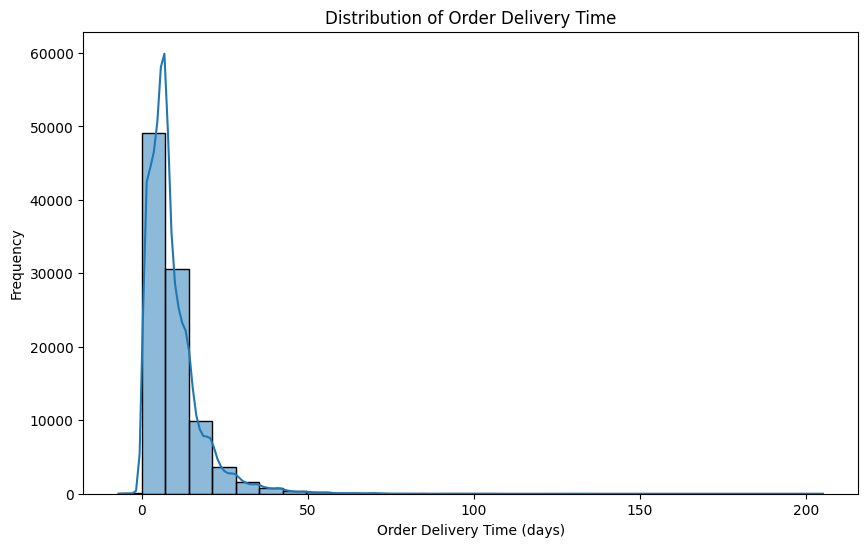

In [90]:
# prompt: plot the hsitogram of order_delivery_time

plt.figure(figsize=(10, 6))
sns.histplot(orders_df['order_delivery_time_d'], bins=30, kde=True)
plt.title('Distribution of Order Delivery Time')
plt.xlabel('Order Delivery Time (days)')
plt.ylabel('Frequency')
plt.show()

In [91]:
orders_df['order_delivery_time_d'].describe()

,order_delivery_time_d
count,96484.000000
mean,9.317862
std,8.747105
min,-6.989653
25%,4.093524
50%,7.094606
75%,12.026539
max,205.190972


- Distribusi menunjukkan bentuk yang positive skewed. Artinya mayoritas pesanan dikirimkan dalam waktu singkat, tetapi beberapa pesanan memiliki waktu penegiriman yang jauh lebih lama
- Puncak distribusi berada pada rentang 0-10 hari. Hal ini menunjukkan bahwa sebagian besar barang memiliki waktu pengiriman pada rentang ini
- Beberapa pesanan memerlukan waktu 100-200 harian untuk dikirimkan (outlier). Hal ini bisa terjadi karena faktor lokasi pelanggan atau kesalahan pihak jasa pengiriman.

### Explore `customers_df`

In [92]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
16573,98adb1ace438c2553c8eda1d1dcf1c20,329aad6fa941f787358a07e787be91e8,14870,jaboticabal,SP
30467,24ed98d5567550a3994317e23fc2df9f,bd192e1a7d5a06d23c13420bc94d3831,32600,betim,MG
52955,886cdc330039c297f54f5c7c75eb0d61,1d455d4c507d54821028c610e54f7b9e,15600,fernandopolis,SP
17178,b846ef8789f3c1086d7777b1c575688f,e11a1b428e150830944b665cb6b2d5da,41185,salvador,BA
98512,4f90b60d6c2988dc9b2842809df82e2f,1b77cc218567e59a749ce9a68f10a379,40283,salvador,BA


In [93]:
customers_df.describe(include=object)

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


Menambahkan status pelanggan (active/non-active) dengan mengecek kehadiran id-nya pada tabel orders_df

In [94]:
customer_id_in_orders = orders_df.customer_id.tolist()
customers_df['status'] = customers_df['customer_id'].apply(lambda x: 'active' if x in customer_id_in_orders else 'non-active')
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
10317,20153d17ff713721abd8b4c082d5e4d5,b695d6a0f8f032b0529c65cf885ca29a,13510,santa gertrudes,SP,active
21442,eeb1498af1ef1f5c9c612b6130298f66,0a767212322d4dfce26644bdd620d2ae,95840,triunfo,RS,active
50061,e97e0db2765185fa3e186bb32344aa15,4cd3b3326574121d1fa353711f5271ce,3648,sao paulo,SP,active
98095,4d47b7a61cf3d32d4ec12b531a57539b,2d5c600f8cc7477dc616b9bd2d00a0fd,82560,curitiba,PR,active
10619,c90a8bc2bffa9389ee8c5246cb9a5f7b,1ce5ea22362a448f831947d9f0d0ce07,11702,praia grande,SP,active


In [95]:
customers_df['status'].value_counts()

,count
status,
active,99441


In [96]:
customers_df.shape

(99441, 6)

Tidak ada pelanggan yang tidak aktif. Semua pelanggan yang terdaftar pernah membeli/mencoba membeli produk perusahan.

### Explore `customers_df` & `orders_df`

In [97]:
# Merge customers_df and orders_df
orders_customers_df = pd.merge(customers_df, orders_df, on='customer_id', how='inner')
orders_customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_processing_time_h,order_shipping_time_d,order_delivery_time_d
84247,56a5e4fa7055699b07bde561183ea999,a30978aee433167a339b46d2463b81b9,22745,rio de janeiro,RJ,active,dcbca116084725bc77c3e8b6480c4d82,delivered,2017-08-22 17:12:58,2017-08-22 17:32:17,2017-08-23 17:05:01,2017-08-24 21:05:22,2017-09-18,0.321944,0.981065,1.166910
36314,27f79ededcca8576f9fccc6679bd1794,41092bc6917d5a5eef6fa4053e08319d,5459,sao paulo,SP,active,3fb5cb07abb84703f0890f6c92589bb8,delivered,2017-02-19 18:40:29,2017-02-19 18:50:18,2017-02-22 15:08:20,2017-02-24 13:57:57,2017-03-23,0.163611,2.845856,1.951123
14381,f3521c6dd56bd56fad9342c57bdb6b7d,fbc6a43c55d022b0705eea269e3e940d,37464,itanhandu,MG,active,b458ffdf7369c1e76ef5ba66155886da,delivered,2017-08-11 17:26:44,2017-08-11 17:43:50,2017-08-15 21:12:36,2017-08-21 17:17:55,2017-09-04,0.285000,4.144977,5.837025
81801,6e392890031d7887d1fdc8cd87c2538e,93305f788b3720a3f7c8002bf4c945e6,44002,feira de santana,BA,active,641a6b3010ebd6619b68befb30b05092,delivered,2017-07-13 18:25:24,2017-07-15 03:25:18,2017-07-19 18:54:58,2017-07-21 17:39:26,2017-08-10,32.998333,4.645602,1.947546
36229,2d8fb851ae0bb19c4ffedc1939b9559f,da4ea1f9cbd08194b42f2f8278b16225,20785,rio de janeiro,RJ,active,4b831e2d8329f605574def6a9e47d65f,delivered,2018-04-01 20:17:21,2018-04-01 20:30:13,2018-04-02 19:28:56,2018-04-16 21:24:39,2018-05-04,0.214444,0.957442,14.080359


#### Melihat jumlah order per kota dan per state

In [98]:
orders_customers_df.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False)

,order_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


Diketahui bahwa perusahaan memiliki pelanggan terbanyak berasal dari kota Sao Paulo. Pada urutan kedua adalah kota Rio de Jaeniro dan diikuti Belo Horizonte dan Brazilia pada urutan tiga dan empat.

In [99]:
orders_customers_df.groupby(by='customer_state').order_id.nunique().sort_values(ascending=False).head(3)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635


In [100]:
orders_customers_df.groupby(by='customer_state').order_id.nunique().sort_values(ascending=True).head(3)

,order_id
customer_state,
RR,46
AP,68
AC,81


Negara bagian asal order paling banyak adalah SP (Sao Paulo) diikuti RJ (Rio de Jainero), sedangkan negara bagian asal jumlah pelanggan tersedikit adalah GO (Goias).

#### Melihat rata-rata waktu kirim berdasarkan kota

In [101]:
orders_customers_df.customer_city.value_counts()

,count
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
bequimao,1
andarai,1
vargem grande,1


In [102]:
orders_customers_df.groupby(by='customer_city').order_delivery_time_d.mean().sort_values(ascending=False).head(10)

,order_delivery_time_d
customer_city,
novo brasil,145.937697
capinzal do norte,104.342569
adhemar de barros,92.413021
arace,81.389815
marcelino vieira,71.841736
aramari,71.206354
humildes,69.926586
serra dos dourados,69.886667
santa cruz de goias,64.998027


Pengiriman ke kota Novo Brazil memakan waktu yang paling lama, hampir 5 bulan. Diikuti pengiriman ke Capinzal do Norte yang memakan waktu 3 bulan lebih. Kemungkinan yang masuk akan mengenai lamanya pengiriman adalah kesalahan yang dilakukan oleh jasa ekspedisi sehingga barang terjebak di gudang dalam waktu yang lama.

In [103]:
orders_customers_df[orders_customers_df['customer_city'] == 'novo brasil']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_processing_time_h,order_shipping_time_d,order_delivery_time_d
61229,919dc37f94a27a8b5cac7fd53291afd4,3edbdef5636cc6b1a8c4f661a8910ba2,29724,novo brasil,ES,active,cce224811ba8fea016c049693c3e0402,delivered,2018-02-28 12:30:39,2018-02-28 12:48:38,2018-03-02 18:11:39,2018-07-26 16:41:56,2018-03-22,0.299722,2.224317,145.937697


In [104]:
id_product = order_items_df[order_items_df['order_id']=='cce224811ba8fea016c049693c3e0402'].product_id
products_df[products_df['product_id'].isin(id_product)]

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_name_english
11714,ac44def10e24998cdee20a208d691127,cama_mesa_banho,55.0,1208.0,1.0,1175.0,45.0,7.0,35.0,bed_bath_table


Dari data yang ditelusuri, didapat bahwa barang yang pengirimannya paling lama berkategori bed_bath_table dengan dimensi panjangxlebarxtinggi 45x35x7. Sedikit tidak masuk akal barang jenis ini dikirimkan begitu lama. Saya asumsikan terjadi kesalahan pada jasa ekspedisi pengiriman sehingga barang tersimpan begitu lama di gudang.


### Explore `products_df` & `order_items_df`

In [105]:
products_df.sample(5)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_name_english
10929,bf467e0b677a9c83c0c71fc3b8f6f7d6,relogios_presentes,56.0,777.0,2.0,275.0,16.0,11.0,11.0,watches_gifts
21358,e95ee6822b66ac6058e2e4aff656071a,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure
5827,d94b7d89fbd70f6f30c9043718784da9,brinquedos,35.0,939.0,2.0,4368.0,47.0,35.0,37.0,toys
23449,a519511d5c5c1153c9f636288e50f819,moveis_decoracao,51.0,637.0,1.0,3200.0,40.0,35.0,40.0,furniture_decor
29533,6cb77fe886eb23d371dcce2d429612a7,utilidades_domesticas,57.0,742.0,1.0,1450.0,33.0,31.0,26.0,housewares


In [106]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_name_english
count,32951,32951,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000,32951
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3639
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.848827,30.815078,16.937661,23.196728,NaN
std,NaN,NaN,10.245741,635.115225,1.736766,4281.974864,16.914458,13.637554,12.079047,NaN
min,NaN,NaN,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,NaN


#### Melihat dimensi kategori produk

In [107]:
products_df.groupby(by='category_name_english').agg({
    "product_id" : "nunique",
    "product_length_cm" : ["max", "min", "mean", "std"],
    "product_height_cm" : ["max", "min", "mean", "std"],
    "product_width_cm" : ["max", "min", "mean", "std"],
    "product_weight_g" : ["max", "min", "mean", "std"]
})

product_id product_length_cm                   \
                              nunique               max   min       mean   
category_name_english                                                      
agro_industry_and_commerce         74              99.0  11.0  36.527027   
air_conditioning                  124             105.0  16.0  36.467742   
art                                55             100.0  16.0  35.927273   
arts_and_craftmanship              19             105.0  16.0  28.368421   
audio                              58              40.0  16.0  20.827586   
...                               ...               ...   ...        ...   
stationery                        849             101.0  11.0  29.062426   
tablets_printing_image              9              60.0  16.0  28.111111   
telephony                        1134              40.0  12.0  18.432981   
toys                             1411             105.0  12.0  31.754784   
watches_gifts                    1329             105.0  11.0  19.222724   

                                      product_height_cm                  \
                                  std               max  min       mean   
category_name_english                                                     
agro_industry_and_commerce  18.621113             105.0  2.0  28.945946   
air_conditioning            18.912050              76.0  2.0  23.887097   
art                         20.836093              62.0  2.0  11.800000   
arts_and_craftmanship       20.819890              25.0  2.0   9.789474   
audio                        5.544518              31.0  2.0  11.500000   
...                               ...               ...  ...        ...   
stationery                  13.991898              70.0  2.0  19.586572   
tablets_printing_image      13.157170              27.0  3.0   9.444444   
telephony                    2.441623              51.0  2.0   6.853616   
toys                        15.034078              82.0  2.0  20.722892   
watches_gifts                6.493514              45.0  2.0  10.292701   

                                      product_width_cm                   \
                                  std              max   min       mean   
category_name_english                                                     
agro_industry_and_commerce  21.270529             80.0  10.0  25.810811   
air_conditioning            16.577588             56.0   8.0  26.088710   
art                         10.043240             70.0  11.0  23.363636   
arts_and_craftmanship        5.912125             65.0  11.0  21.052632   
audio                        6.105074             32.0  11.0  17.344828   
...                               ...              ...   ...        ...   
stationery                  15.405061             90.0   9.0  23.346290   
tablets_printing_image       7.264832             40.0  11.0  21.555556   
telephony                    5.117999             30.0   8.0  13.248677   
toys                        12.830334            104.0   9.0  24.926293   
watches_gifts                5.093637             48.0   6.0  15.268623   

                                      product_weight_g                      \
                                  std              max    min         mean   
category_name_english                                                        
agro_industry_and_commerce  13.142711          30000.0   50.0  5263.405405   
air_conditioning            11.771546          23300.0  100.0  4459.959677   
art                         13.394808          15400.0  100.0  1691.763636   
arts_and_craftmanship       12.756147           6850.0  100.0  1164.578947   
audio                        5.738610           6663.0  100.0   641.637931   
...                               ...              ...    ...          ...   
stationery                  10.416457          29000.0    2.0  1763.113074   
tablets_printing_image       8.719391           1100.0  100.0   381.444444   
te

#### Melihat produk yang menghasilkan pemasukan paling besar

Sebuah produk dianggap menghasilkan pemasukan apabila order yang mengandung produk tersebut berstatus `delivered` atau terkirimkan ke pelanggan. Jika produk belum terkirimkan, masih ada kemungkinan pelanggan membatalkan pemesanan atau pengiriman produk mengalami kendala sehingga perusahaan bukannya mendapatkan pemasukan, malahan bisa rugi.

In [108]:
from itertools import count
# Mencari order_id dari pesanan yang delivered
delivered_orders_id = orders_df[orders_df['order_status'] == 'delivered'].order_id.tolist()

# Dataframe mengandung semua order terkirimkan
delivered_orders_df = order_items_df[order_items_df['order_id'].isin(delivered_orders_id)]

# Group by product_id and sum the price
product_price_sum = delivered_orders_df.groupby('product_id')['price'].sum().reset_index()
product_count_sum = delivered_orders_df.groupby('product_id')['order_id'].nunique().reset_index()

# Merge with products_df to get the product_category_name
revenue_product_by_cat = pd.merge(product_price_sum, products_df, on='product_id', how='left')
count_product_by_cat = pd.merge(product_count_sum, products_df, on='product_id', how='left')

# Group by category_name_english and sum the price
revenue_product_by_cat = revenue_product_by_cat.groupby('category_name_english')['price'].sum().reset_index()
count_product_by_cat = count_product_by_cat.groupby('category_name_english')['order_id'].count().reset_index()

# Display the result
revenue_product_by_cat[['category_name_english', 'price']].sort_values(by='price', ascending=False).head(10)

,category_name_english,price
43,health_beauty,1233131.72
7,bed_bath_table,1194161.39
72,watches_gifts,1166176.98
67,sports_leisure,954852.55
15,computers_accessories,888724.61
39,furniture_decor,711927.69
49,housewares,615628.69
20,cool_stuff,610204.10
5,auto,578966.65
71,toys,471286.48


In [109]:
product_price_sum.shape

(32216, 2)

In [110]:
count_product_by_cat[['category_name_english', 'order_id']].sort_values(by='order_id', ascending=False).head(10)

,category_name_english,order_id
7,bed_bath_table,3575
67,sports_leisure,2822
39,furniture_decor,2593
43,health_beauty,2397
49,housewares,2282
5,auto,1853
15,computers_accessories,1600
71,toys,1373
72,watches_gifts,1300
70,telephony,1112


In [111]:
merged_df = pd.merge(products_df, delivered_orders_df, on='product_id', how='inner')
merged_df.groupby('category_name_english').agg({
    'order_id' : 'nunique',
    'price' : ['min', 'max']
}).sort_values(by=('order_id', 'nunique'), ascending=False)

order_id   price         
                                       nunique     min      max
category_name_english                                          
bed_bath_table                           10656    3.00  3980.00
health_beauty                             8647    1.20  3124.00
sports_leisure                            7530    4.50  4059.00
computers_accessories                     6530    3.90  3699.99
furniture_decor                           6307    4.90  1899.00
...                                        ...     ...      ...
kitchen_appliances_and_food_preparers       13   17.42  1099.00
cds_dvds_musicals                           12   45.00    65.00
pc_gamer                                     7  129.99   219.00
fashion_childrens_clothes                    7   39.99   110.00
security_and_services                        2  100.00   183.29

[73 rows x 3 columns]

### Melihat jumlah produk unik terjual pada setiap kategori

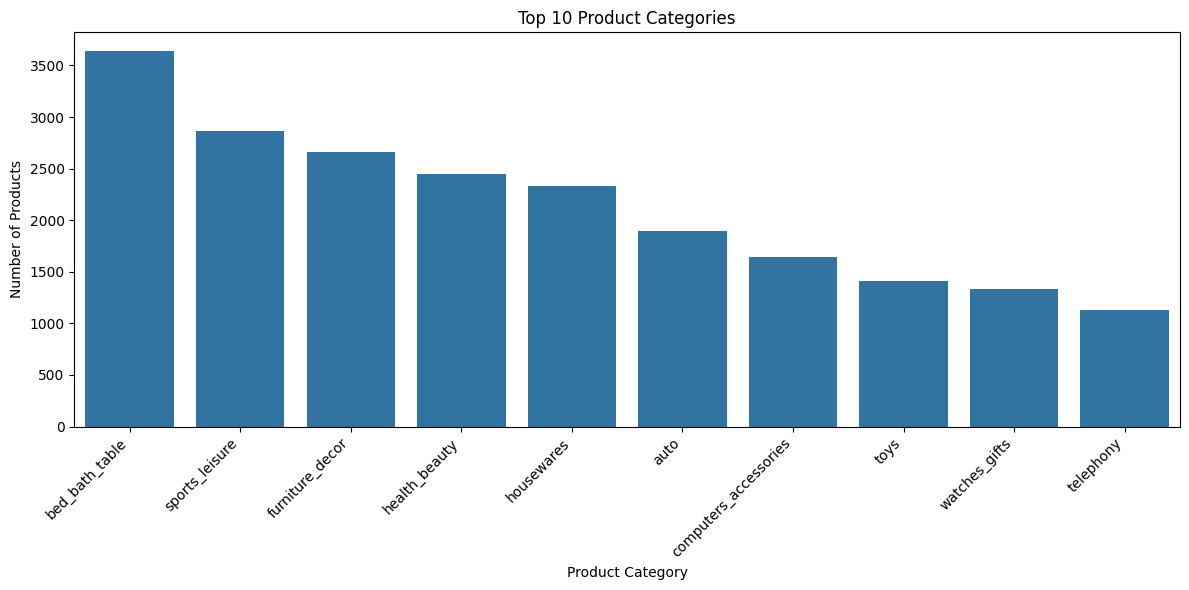

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'product_category_counts' is already defined from the previous code
product_category_counts = products_df['category_name_english'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=product_category_counts.index, y=product_category_counts.values)
plt.title('Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Dari tabel di atas, diketahui bahwa kategori produk dengan produk unik paling banyak adalah kategori cama_mesa_banho atau keperluan kamar mandi, meja, dan tempat tidur dengan frekuensi kemunculan sebanyak 3575.

### Melihat `geolocation_df`

In [113]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
512666,28021,-21.798255,-41.287754,campos dos goytacazes,RJ
299086,13202,-23.192924,-46.876425,jundiai,SP
643661,38280,-19.726084,-50.201005,iturama,MG
671768,40375,-12.948779,-38.494365,salvador,BA
8475,1303,-23.549797,-46.650522,são paulo,SP


## Visualization & Explanatory Analysis

### Pertanyaan 1 : Apakah ada kaitan antara lama pengiriman dan tingkat kepuasan pelanggan?

In [114]:
# Gabungkan DataFrame orders_df dan order_reviews_df
merged_df = pd.merge(orders_df, order_reviews_df, on='order_id', how='inner')

In [115]:
# Tambahkan kolom kategori pengiriman
bins = [0, 7, 14, 30, 150]
labels = ['0-7 hari', '8-14 hari', '15-30 hari', '31-150 hari']
merged_df['delivery_category'] = pd.cut(merged_df['order_delivery_time_d'], bins=bins, labels=labels)

In [116]:
merged_df.groupby('delivery_category').agg({
    'review_score' : ['mean', 'min', 'max', 'count']
})

<ipython-input-116-dcdd35c9ba0f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('delivery_category').agg({


review_score               
                          mean min max  count
delivery_category                            
0-7 hari              4.342311   1   5  46414
8-14 hari             4.243747   1   5  32144
15-30 hari            3.766753   1   5  15117
31-150 hari           1.995386   1   5   2601

<ipython-input-117-9ea06bd711a7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_review_by_category = merged_df.groupby('delivery_category')['review_score'].mean().reset_index()


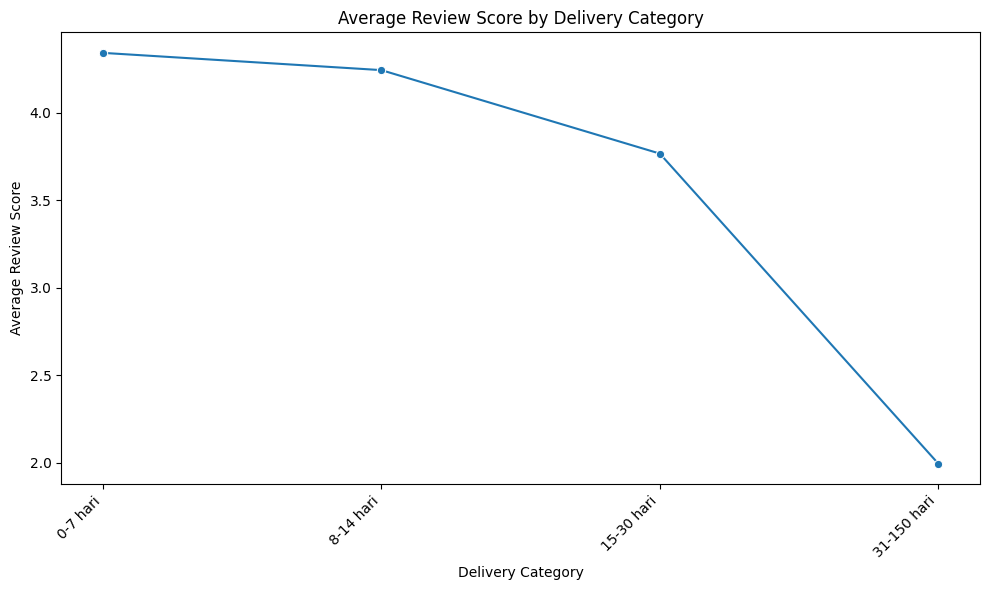

In [117]:
# Group data by delivery category and calculate the average review score
average_review_by_category = merged_df.groupby('delivery_category')['review_score'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='delivery_category', y='review_score', data=average_review_by_category, marker='o')
plt.title('Average Review Score by Delivery Category')
plt.xlabel('Delivery Category')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Ada korelasi negatif antara lamanya waktu pengiriman dengan review oleh pelanggan. Pelanggan cenderung kurang puas seiring lamanya waktu pengiriman.

### Pertanyaan 2: Apa jenis produk yang memberi income paling besar bagi perusahaan selama ini? Apakah sejalan dengan banyaknya produk jenis tersebut yang terjual?

In [118]:
revenue_product_by_cat[['category_name_english', 'price']].sort_values(by='price', ascending=False).head(10)

,category_name_english,price
43,health_beauty,1233131.72
7,bed_bath_table,1194161.39
72,watches_gifts,1166176.98
67,sports_leisure,954852.55
15,computers_accessories,888724.61
39,furniture_decor,711927.69
49,housewares,615628.69
20,cool_stuff,610204.10
5,auto,578966.65
71,toys,471286.48


<ipython-input-119-5419b9262f97>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_name_english', y='price', data=top_10_categories, palette=category_colors) # Use a color palette


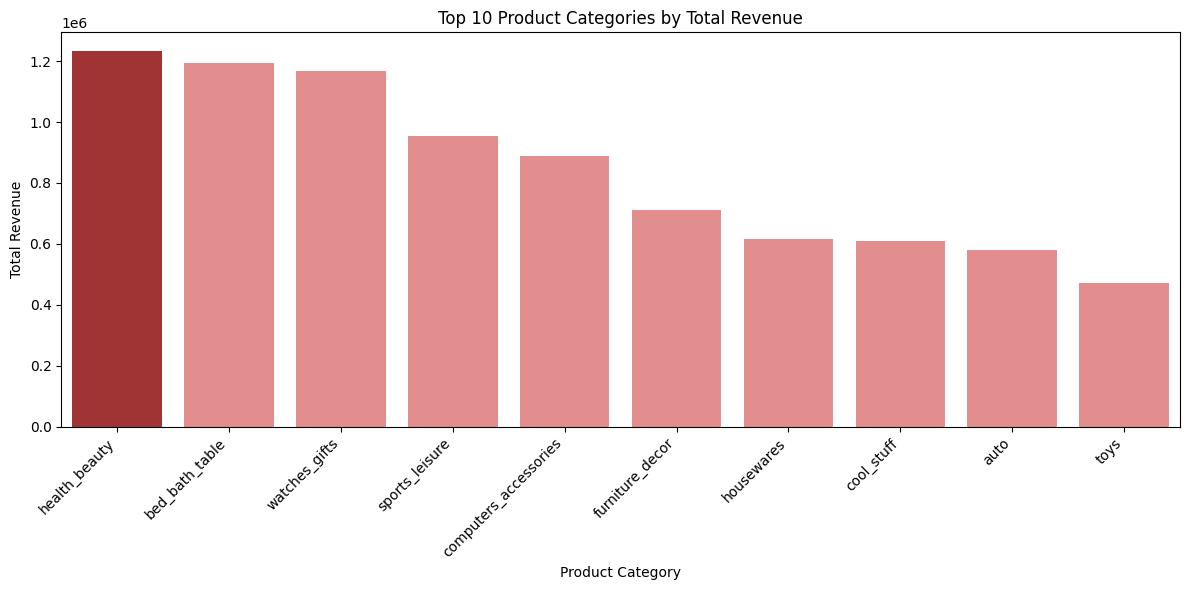

In [119]:
top_10_categories_revenue = revenue_product_by_cat.sort_values(by='price', ascending=False).head(10)
category_colors = ['firebrick' if cat == top_10_categories_revenue['category_name_english'].iloc[0] else 'lightcoral'
                   for cat in top_10_categories_revenue['category_name_english']]

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='category_name_english', y='price', data=top_10_categories_revenue, palette=category_colors) # Use a color palette

plt.title('Top 10 Product Categories by Total Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-127-5dfc37ebdea3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_name_english', y='order_id', data=top_10_categories_sold, palette=category_colors)


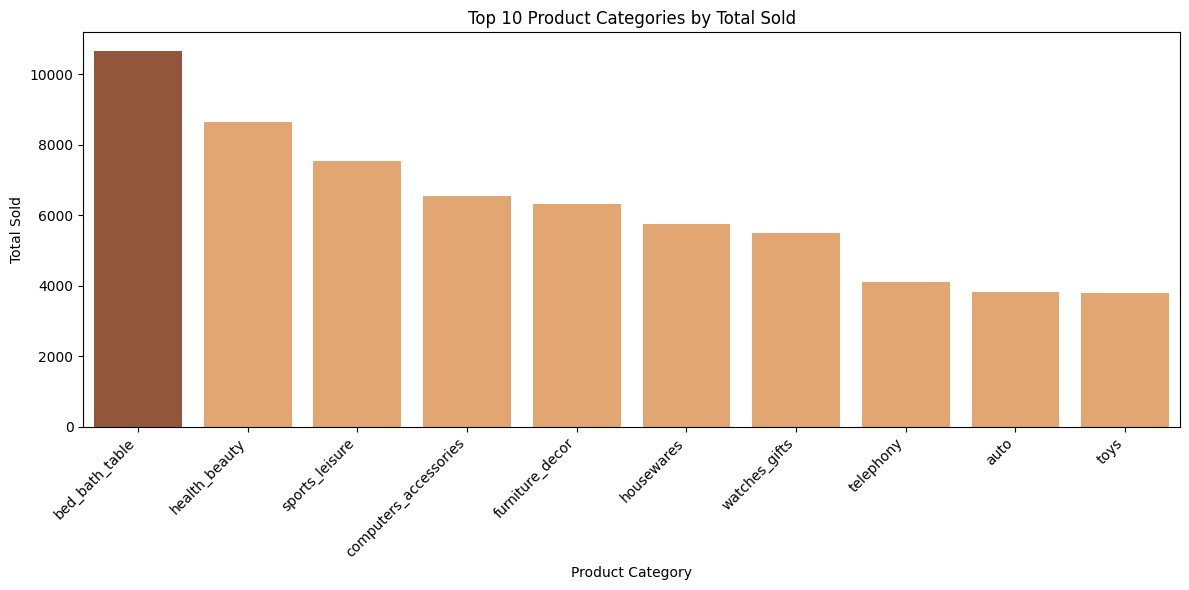

In [127]:
merged_df = pd.merge(products_df, delivered_orders_df, on='product_id', how='inner')
merged_df = merged_df.groupby('category_name_english').agg({
    'order_id' : 'nunique'
}).sort_values(by=('order_id'), ascending=False)
merged_df = merged_df.reset_index()

top_10_categories_sold = merged_df.head(10)
category_colors = ['sienna' if cat == top_10_categories_sold['category_name_english'].iloc[0] else 'sandybrown'
                   for cat in top_10_categories_sold['category_name_english']]
# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='category_name_english', y='order_id', data=top_10_categories_sold, palette=category_colors)

plt.title('Top 10 Product Categories by Total Sold')
plt.xlabel('Product Category')
plt.ylabel('Total Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Produk kesehatan dan kecantikan 'health_beauty' merupakan penyokong pemasukan perusahaan terbesar, diikuti oleh barang-barang rumah tangga.
- Namun, kategori dengan jumlah barang terjual paling banyak adalah barang rumah tangga 'bed_bath_table' baru diikuti oleh barang kesehatan dan kecantikan 'healt_beauty'.
- Perusahaan bisa mengunggulkan penjualan pada kedua produk tersebut karena keduanya menyumbang kontribusi pandapatan dan jumlah barang terjual paling banyak bagi perusahaan.

### Pertnyaan 3: Bagaimana tren penjualan selama perusahaan berdiri?

In [128]:
merged_df = pd.merge(orders_df, order_items_df, on='order_id', how='inner')

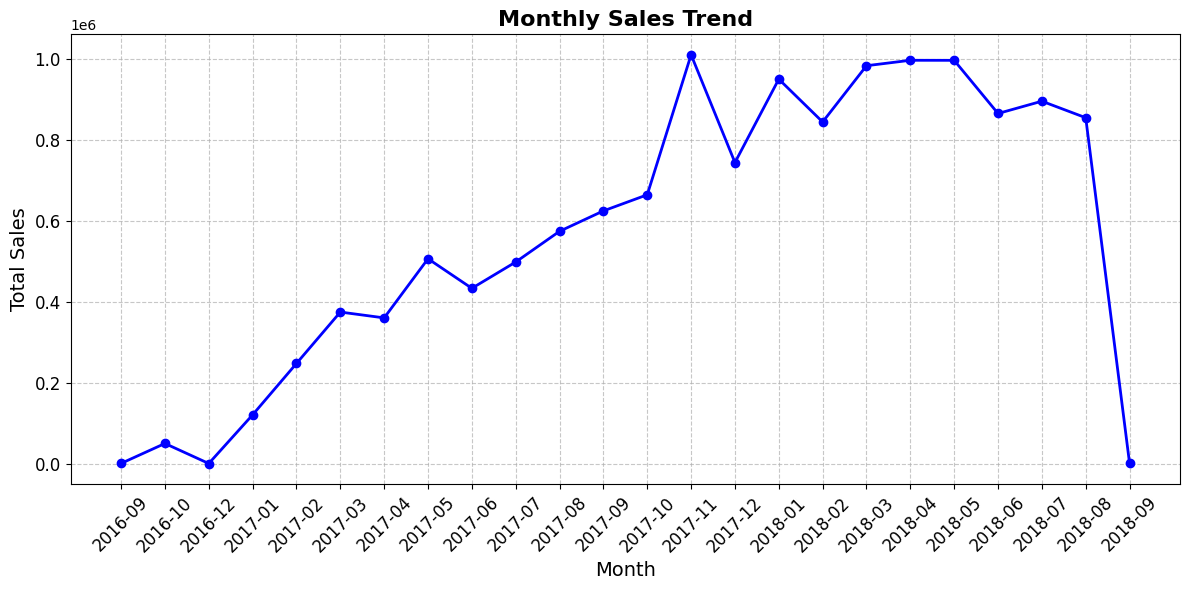

In [129]:
# Monthly sales trend
monthly_sales = merged_df.groupby(merged_df['order_purchase_timestamp'].dt.to_period('M')).agg({'price': 'sum'})

# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# Plot the data with custom colors
plt.plot(monthly_sales.index.astype(str), monthly_sales['price'],
         marker='o', linestyle='-', color="blue", linewidth=2)

# Adding titles and labels
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Customize the ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

- Secara umum, perusahaan selalu tumbuh seiring waktu. Pemasukan perusahaan mengalami tren yang baik dengan konsisten naik, walaupun beberapa kali turun.
- Penurunan ekstrem pada September 2018 yang terlihat pada grafik disebabkan pencatatan data terhenti pada tanggal tersebut pada saat baru satu customer membeli produk.

### Pertanyaan 4: Kota mana saja yang merupakan basis pelanggan bagi perusahaan?

In [130]:
# Langkah 1: Identifikasi kode pos dengan lebih dari satu negara bagian
multiple_state_zip = geolocation_df.groupby('geolocation_zip_code_prefix')['geolocation_state'].nunique().reset_index(name='state_count')
multiple_state_zip = multiple_state_zip[multiple_state_zip['state_count'] >= 2]

# Langkah 2: Tentukan negara bagian dengan jumlah entri terbesar untuk setiap kode pos
max_state = (
    geolocation_df.groupby(['geolocation_zip_code_prefix', 'geolocation_state'])
    .size()
    .reset_index(name='entry_count')
    .sort_values(by=['geolocation_zip_code_prefix', 'entry_count'], ascending=[True, False])
    .drop_duplicates(subset='geolocation_zip_code_prefix')
    [['geolocation_zip_code_prefix', 'geolocation_state']]
)

# Langkah 3: Hitung median latitude dan longitude untuk setiap kombinasi kode pos, kota, dan negara bagian
geolocation_silver = (
    geolocation_df.groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])
    [['geolocation_lat', 'geolocation_lng']]
    .median()
    .reset_index()
)

# Langkah 4: Gabungkan dengan data negara bagian terpilih
geolocation_silver = geolocation_silver.merge(max_state, on=['geolocation_zip_code_prefix', 'geolocation_state'], how='inner')

# Langkah 5: Gabungkan data geolokasi dengan data pelanggan
customers_silver = customers_df.merge(
    geolocation_silver,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
)

# Langkah 6: Hapus duplikasi berdasarkan ID pelanggan unik
customers_silver = customers_silver.drop_duplicates('customer_unique_id')

# Hasil Akhir
print(customers_silver.shape)
customers_silver.head()


(95828, 11)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,active,14409,franca,SP,-20.502307,-47.396740
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,active,9790,sao bernardo do campo,SP,-23.731211,-46.541206
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,active,1151,sao paulo,SP,-23.531294,-46.657039
5,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,active,8775,mogi das cruzes,SP,-23.499025,-46.183436
6,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,active,13056,campinas,SP,-22.974331,-47.142173


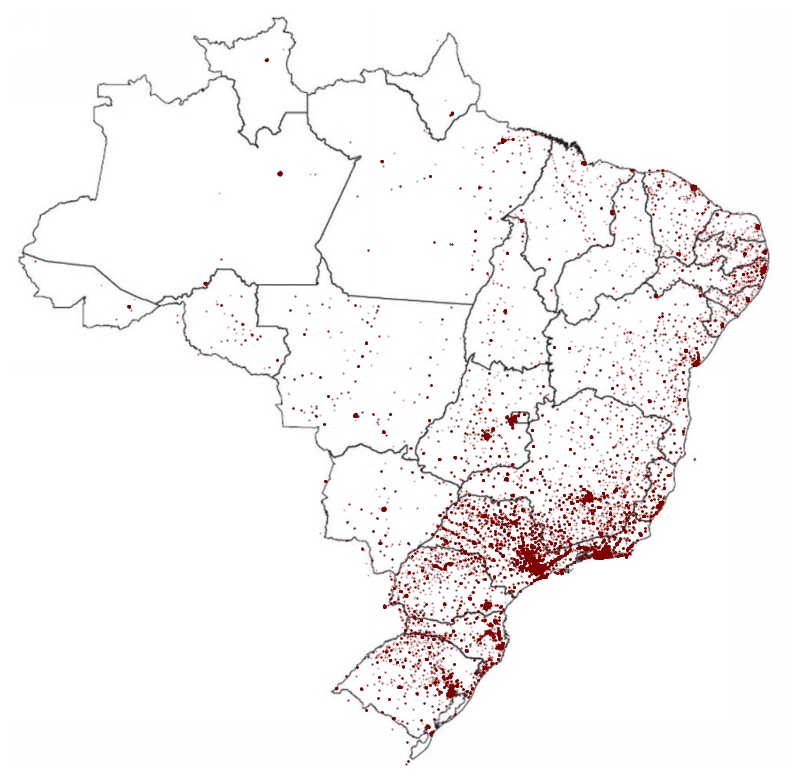

In [131]:
import urllib.request
import matplotlib.image as mpimg

def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

- Pelanggan datang paling banyak berasal dari daerah tenggara dan selatan, tempat kota-kota besar dengan ekonomi yang kuat berasal, seperti Sao Paolo dan Rio de Jainero.

## Analisis Lanjutan (Opsional)

**RFM Analysis**

Untuk analisis ini, akan dibuat dataset baru hasil modifikasi dan merge dari dataset yang ada. Selain untuk analisis RFM pada proyek notebook, dataset ini juga akan digunakan untuk proyek dashboard streamlit.

In [132]:
product_performance_df = orders_df[['order_id', 'order_purchase_timestamp', 'customer_id']]
product_performance_df = pd.merge(product_performance_df, order_items_df, on='order_id', how='inner')
product_performance_df = pd.merge(product_performance_df, products_df, on='product_id', how='inner')
product_performance_df = pd.merge(product_performance_df, customers_df, on='customer_id', how='inner')
product_performance_df.drop(columns=['order_item_id', 'seller_id', 'shipping_limit_date', 'freight_value', 'product_name_length', 'product_description_length', 'product_photos_qty', 'product_weight_g',	'product_length_cm',	'product_height_cm',	'product_width_cm', 'product_category_name' ], inplace=True)
product_performance_df.sort_values(by='order_purchase_timestamp', ascending=False)
product_performance_df.shape

(112650, 11)

In [133]:
product_performance_df.rename(columns={
    'price': 'total_price'
    }, inplace=True)
product_performance_df.groupby('category_name_english').agg({
    'order_id' : 'nunique',
    'total_price' : ['min', 'max']
}).sort_values(by=('order_id', 'nunique'), ascending=False)

order_id total_price         
                           nunique         min      max
category_name_english                                  
bed_bath_table               10860        3.00  3980.00
health_beauty                 8836        1.20  3124.00
sports_leisure                7720        4.50  4059.00
computers_accessories         6689        3.90  3699.99
furniture_decor               6449        4.90  1899.00
...                            ...         ...      ...
la_cuisine                      13       24.00   389.00
cds_dvds_musicals               12       45.00    65.00
pc_gamer                         8      129.99   239.00
fashion_childrens_clothes        8       39.99   110.00
security_and_services            2      100.00   183.29

[73 rows x 3 columns]

In [134]:
from google.colab import files
product_performance_df.rename(columns={
    'price': 'total_price'
    }, inplace=True)
product_performance_df.to_csv('product_performance_df.csv', index=False)
files.download('product_performance_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [135]:
# Customer by Recency
recency_df = product_performance_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp' : 'max'
}).reset_index()
recency_df['recency'] = product_performance_df['order_purchase_timestamp'].max() - recency_df['order_purchase_timestamp']
recency_df['recency'] = recency_df['recency'].dt.days

# Customer by Frequency
frequency_df = product_performance_df.groupby('customer_unique_id').agg({
    'order_id' : 'nunique'
}).reset_index()

# Customer by Monetary
monetary_df = product_performance_df.groupby('customer_unique_id').agg({
    'total_price' : 'sum'
}).reset_index()


In [136]:
recency_df.head(5)

,customer_unique_id,order_purchase_timestamp,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [137]:
frequency_df.head(5)

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [138]:
monetary_df.head(5)

,customer_unique_id,total_price
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00


In [139]:
rfm_df = pd.merge(recency_df, frequency_df, on='customer_unique_id', how='inner')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_unique_id', how='inner')
rfm_df.rename(columns={
    'order_id' : 'frequency',
    'total_price' : 'monetary'
}, inplace=True)

rfm_df.head()

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,1,180.00


In [140]:
rfm_df['R_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm_df.head()

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,1,129.90,76.213058,48.474114,48.474114
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,1,18.90,75.183924,48.474114,48.474114
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541,1,69.00,3.600398,48.474114,48.474114
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325,1,25.99,28.808950,48.474114,48.474114
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,1,180.00,33.820478,48.474114,48.474114


In [141]:
rfm_df['RFM_Score'] = (
    0.15 * rfm_df['R_rank_norm'] +
    0.28 * rfm_df['F_rank_norm'] +
    0.57 * rfm_df['M_rank_norm']
)

# Adjust RFM_Score weight and round values
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)

# Sort by RFM_Score in descending order
rfm_df = rfm_df.sort_values(by='RFM_Score', ascending=False)

# Display top 10 customers based on RFM_Score
rfm_df[['customer_unique_id', 'RFM_Score']].head(10)

,customer_unique_id,RFM_Score
82305,dc813062e0fc23409cd255f7f53c7074,5.00
83784,e0836a97eaae86ac4adc26fbb334a527,4.99
58507,9cc5a07f169a1606fd347a56683e6ea6,4.99
19723,34b0cd95480e55c2a701293a2b9671b3,4.99
52597,8d50f5eadf50201ccdcedfb9e2ac8455,4.99
45330,795c1622cf7a53d63d324e862349d01c,4.99
85539,e53fd5575f1418397aae732c5755b6fc,4.99
92752,f8bc1d81f395f6239a2a5ab1b9edf1ab,4.99
82231,dc48b0a1b0e6abb6586f322c189f6b93,4.99
29774,4facc2e6fbc2bffab2fea92d2b4aa7e4,4.98


In [142]:
rfm_df["Customer_segment"] = np.where(
    rfm_df['RFM_Score'] > 4.5, "Top Customers",
    np.where(
        rfm_df['RFM_Score'] > 4, "High Value Customer",
        np.where(
            rfm_df['RFM_Score'] > 3, "Medium Value Customer",
            np.where(
                rfm_df['RFM_Score'] > 1.6, "Low Value Customers", "Lost Customers"
            )
        )
    )
)

rfm_df[['customer_unique_id', 'RFM_Score', 'Customer_segment']].head(20)

,customer_unique_id,RFM_Score,Customer_segment
82305,dc813062e0fc23409cd255f7f53c7074,5.00,Top Customers
83784,e0836a97eaae86ac4adc26fbb334a527,4.99,Top Customers
58507,9cc5a07f169a1606fd347a56683e6ea6,4.99,Top Customers
19723,34b0cd95480e55c2a701293a2b9671b3,4.99,Top Customers
52597,8d50f5eadf50201ccdcedfb9e2ac8455,4.99,Top Customers
45330,795c1622cf7a53d63d324e862349d01c,4.99,Top Customers
85539,e53fd5575f1418397aae732c5755b6fc,4.99,Top Customers
92752,f8bc1d81f395f6239a2a5ab1b9edf1ab,4.99,Top Customers
82231,dc48b0a1b0e6abb6586f322c189f6b93,4.99,Top Customers
29774,4facc2e6fbc2bffab2fea92d2b4aa7e4,4.98,Top Customers


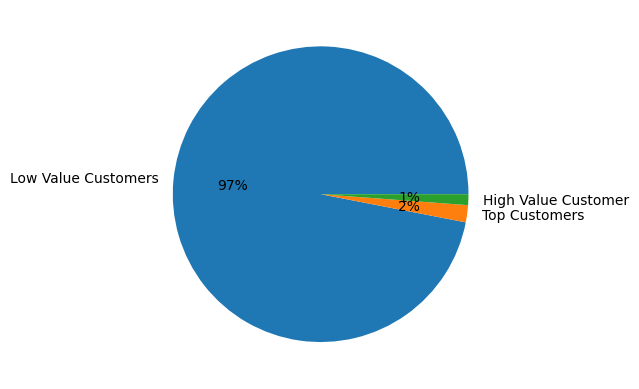

In [143]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

- Perusahaan sedang tidak baik-baik saja karena 97% customernya merupakan Low Value Customer
- Perlu dilakukan evaluasi mengapa kebanyakan customer adalah customer yang 'sekali datang, sekali membeli, sedikit memberi'.  
- Perlu dipikirkan apa mungkin ada kesalahan pelayanan yang membuat customer tidak setia

## Conclusion

- Conclusion pertanyaan 1
> Berdasarkan data, terdapat korelasi negatif antara lamanya waktu pengiriman dan review_score yang diberikan oleh pelanggan. Semakin lama waktu pengiriman, semakin rendah rata-rata skor ulasan yang diberikan. Pengiriman dalam waktu 0-7 hari memiliki rata-rata skor tertinggi sebesar 4.34, sementara pengiriman dalam 31-150 hari menunjukkan penurunan signifikan dengan rata-rata skor hanya 1.99.
- Conclusion pertanyaan 2
> Kategori barang dengan pendapatan terbesar adalah **health_beauty** (kesehatan dan kecantikan), diikuti oleh **bed_bath_table** (alat tidur, mandi, dan meja). Meskipun memberikan pendapatan tertinggi, **health_beauty** hanya menempati peringkat kedua dalam jumlah penjualan, sementara **bed_bath_table** menduduki peringkat pertama. Perusahaan harus memaksimalkan penjualan kedua kategori produk ini karena terbukti memberikan kontribusi pendapatan dan jumlah barang terjual paling banyak.

- Conclution pertanyaan 3
> Terdapat peningkatan penjualan secara konsisten dari September 2016 hingga November 2017. Pada November 2017, terjadi peningkatan penjualan tertinggi. Hal ini kemungkinan besar terkait dengan Black Friday yang biasanya jatuh pada bulan November. Setelah puncak di November 2017, terlihat adanya penurunan hingga Februari 2018, meskipun masih berada pada level yang relatif tinggi. Ini dapat dihubungkan dengan pola konsumsi setelah periode promosi besar-besaran (efek pasca-Black Friday).

- Conclusion pertanyaan 4
> Berdasarkan grafik yang dibuat, terlihat bahwa distribusi pelanggan di Brasil terkonsentrasi di wilayah tenggara dan selatan. Kota-kota besar seperti São Paulo, Rio de Janeiro, Porto Alegre, dan Belo Horizonte menjadi pusat utama pelanggan. Konsentrasi ini dapat dijelaskan oleh faktor-faktor seperti jumlah penduduk yang lebih besar, infrastruktur yang lebih maju, serta daya beli yang lebih tinggi di kawasan tersebut.

## Download Dataset Untuk Dashboard

Dalam rancangannya, dashboard saya akan memiliki fitur-fitur berikut:
- Daily Report : pendapatan harian, jumlah customer, grafik daily revenue
- Product Performance : produk terjual paling banyak, produk terjual paling sedikit
- Customer Performance : peforma customer berdasarkan RFM analysis
- Customer Demographics : demografi customer  

Untuk itu, diperlukan dataset khusus untuk dimuat dalam dashboard analisis data saya. Berikut datasetnya.

In [144]:
sum_price_by_orderid = order_items_df.groupby('order_id')['price'].sum().reset_index()
sum_price_by_orderid.rename(columns={'price': 'total_revenue'}, inplace=True)
sum_price_by_orderid.sort_values(by='total_revenue', ascending=False).shape

(98666, 2)

In [145]:
sum_price_by_orderid = pd.merge(sum_price_by_orderid, orders_df, on='order_id', how='inner')
sum_price_by_orderid = sum_price_by_orderid[sum_price_by_orderid['order_status'] == 'delivered']
sum_price_by_orderid.sort_values(by='total_revenue', ascending=False).head(10)

,order_id,total_revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_processing_time_h,order_shipping_time_d,order_delivery_time_d
1455,03caa2c082116e1d31e67e9ae3700499,13440.0,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,72.057778,8.010382,7.110556
44467,736e1922ae60d0d6a89247b851902527,7160.0,ec5b2ba62e574342386871631fafd3fc,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-07-20 13:09:00,2018-07-26 22:03:06,2018-08-02,37.697778,3.359306,6.370903
3130,0812eb902a67711a1cb742b3cdaa65ae,6735.0,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09,0.126667,3.526400,15.208391
98298,fefacc66af859508bf1a7934eab1e97f,6729.0,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10,33.915556,7.442211,12.010995
94439,f5136e38d1a14a4dbd87dff67da82701,6499.0,3fd6777bbce08a352fddd04e4a7cc8f6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28,32.511944,0.357986,10.242373
17114,2cc9089445046817a7539d90805e6e5a,5934.6,05455dfa7cd02f13d132aa7a6a9729c6,delivered,2017-11-24 11:03:35,2017-11-28 12:55:46,2017-12-06 11:52:14,2017-12-13 12:16:02,2017-12-22,97.869722,7.955880,7.016528
65046,a96610ab360d42a2e5335a3998b4718a,4799.0,df55c14d1476a9a3467f131269c2477f,delivered,2017-04-01 15:58:40,2017-04-03 13:25:18,2017-04-11 15:10:34,2017-04-17 11:04:45,2017-05-02,45.443889,8.073102,5.829294
9868,199af31afc78c699f0dbf71fb178d4d4,4690.0,24bbf5fd2f2e1b359ee7de94defc4a15,delivered,2017-04-18 18:50:13,2017-04-19 15:50:15,2017-04-25 13:39:59,2017-05-07 10:42:39,2017-05-15,21.000556,5.909537,11.876852
54353,8dbc85d1447242f3b127dda390d56e19,4590.0,3d979689f636322c62418b6346b1c6d2,delivered,2018-06-22 12:23:19,2018-06-22 12:36:36,2018-06-22 13:00:00,2018-07-06 01:08:30,2018-07-17,0.221389,0.016250,13.505903
81426,d2f270487125ddc41fd134c4003ad1d7,4400.0,cc803a2c412833101651d3f90ca7de24,delivered,2018-05-31 22:57:07,2018-06-02 19:50:18,2018-06-04 08:12:00,2018-06-05 20:42:09,2018-06-28,44.886389,1.515069,1.520938


In [146]:
sum_price_by_orderid.to_csv('sum_price_by_orderid.csv', index=False)
from google.colab import files
files.download('sum_price_by_orderid.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>